## Importing Required Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Importing dataset

In [2]:
dataset = pd.read_excel('E-com_Data.xlsx')
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


## Understanding the data

In [3]:
# Check the number of rows and columns
dataset.shape

(537979, 12)

In [4]:
# Basic data information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


In [5]:
# Check the unique values in the dataset
dataset.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        3479
Price                16327
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [6]:
# There are 4349 unique CustomerID and 4009 unique Item Code in the dataset

## Data Preprocessing

In [7]:
# Check for missing values
dataset.isnull().sum()

CustomerID           133790
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529634
Reason of return     537976
Sold as set          537979
dtype: int64

In [8]:
# Total % of missing data
dataset.isnull().sum()/len(dataset)*100

CustomerID            24.869000
Item Code              0.000000
InvoieNo               0.000000
Date of purchase       0.000000
Quantity               0.000000
Time                   0.000000
price per Unit         0.000000
Price                  0.000000
Shipping Location      0.000000
Cancelled_status      98.448824
Reason of return      99.999442
Sold as set          100.000000
dtype: float64

In [ ]:
# CustomerID has close to 25% missing data, we will drop the missing data(row-wise)
# Drop the features 'Cancelled_status', 'Reason of return', 'Sold as set' as they have more than 25% missing values

In [9]:
# Check for any duplicate rows present in the dataset
dataset.loc[dataset.duplicated(), :]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
61202,4043.0,15819,403353,2017-12-02,1,14:07:00,447.0,447.0,Location 36,NaN,NaN,NaN
70587,3984.0,15422,405579,2017-12-09,24,14:09:00,77.0,1848.0,Location 36,NaN,NaN,NaN
84823,3828.0,14519,398139,2017-10-31,1,14:04:00,85.0,85.0,Location 36,NaN,NaN,NaN
120521,3384.0,15121,380588,2017-06-11,1,11:37:00,298.0,298.0,Location 36,NaN,NaN,NaN
182786,2607.0,15660,393225,2017-09-30,1,12:31:00,484.0,484.0,Location 36,NaN,NaN,NaN
248215,1852.0,15614,382863,2017-07-02,12,09:53:00,221.0,2652.0,Location 36,NaN,NaN,NaN
310310,1291.0,13958,368695,2017-02-14,2,16:17:00,298.0,596.0,Location 36,NaN,NaN,NaN
325175,1076.0,2020,405755,2017-12-13,12,15:48:00,58.0,696.0,Location 36,NaN,NaN,NaN
414854,NaN,2020,386281,2017-07-31,1,17:09:00,104.0,104.0,Location 36,NaN,NaN,NaN


In [10]:
# Drop the duplicate rows from the dataset
dataset = dataset.drop_duplicates(ignore_index = True)

In [11]:
dataset.shape

(537970, 12)

In [12]:
# Drop the missing data from the 'CustomerID' column
dataset = dataset.dropna(subset = ['CustomerID'])

In [13]:
dataset.shape

(404181, 12)

In [14]:
# We see negative values on 'Quantity' and and 'Price' which is impossible

df_negative = dataset[(dataset.Quantity<0) & (dataset.Price<0)]

In [15]:
df_negative.shape

(8183, 12)

In [16]:
# Excluding negative values from Quantity and Price in the dataset

dataset = dataset[(dataset.Quantity>0) & (dataset.Price>0)]

In [17]:
dataset.shape

(395998, 12)

In [18]:
# Drop the features 'Cancelled_status', 'Reason of return', 'Sold as set' as they have more than 25% missing values
dataset = dataset.drop(['Cancelled_status', 'Reason of return', 'Sold as set'], axis = 1)
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1


In [19]:
# Coverting the 'Date of Purchase' to date format
dataset['Date of purchase'] = pd.to_datetime(dataset['Date of purchase'])

## Creating the RFM DataFrame

In [ ]:
# The objective is to build an unsupervised ML model which can enable the company to analyse their customers
# using the RFM(Recency, Frequency, Monetary) approach.

# Recency =  How reacently a customer made a purchase(Latest Date - last invoice date)
# Latest Date = Todays's date or the Last Date of Purchase in the dataset

# Frequency = How often a customer makes a puchase(the number of invoice number of transactions done by the customer)

# Monetary = How much money a customer spends on purchases(Sum of total amount spent by the customer)

# We need to sort customers based on recency, frequency and monetary values.To calculate recency we will take one day 
# after the last invoice date as the Latest date.

In [20]:
# Finding the Last date of purchase 
dataset['Date of purchase'].max()

Timestamp('2017-12-19 00:00:00')

In [ ]:
# We see the last purchase date is 2017-12-19
# We can determine our date for analysis as 2017-12-20

In [21]:
import datetime as dt
Latest_date = dt.datetime(2017, 12, 20)

In [22]:
Latest_date

datetime.datetime(2017, 12, 20, 0, 0)

In [23]:
rfm = dataset.groupby('CustomerID', sort=False, as_index= False).agg({'Date of purchase' : lambda day : (Latest_date-day.max()).days,
                                        'InvoieNo' : lambda num : num.count(),
                                        'Price' : lambda price : price.sum()}).reset_index()

In [24]:
rfm.head(10)

,index,CustomerID,Date of purchase,InvoieNo,Price
0,0,4355.0,44,21,39209.0
1,1,4352.0,40,118,285781.0
2,2,4349.0,51,98,64097.0
3,3,4341.0,11,104,256324.0
4,4,4339.0,219,88,201305.0
5,5,4333.0,193,124,246358.0
6,6,4331.0,13,164,850894.0
7,7,4328.0,45,242,699346.0
8,8,4325.0,5,272,797952.0
9,9,4313.0,2,134,333049.0


In [25]:
rfm.rename(columns = {'Date of purchase' : 'Recency', 'InvoieNo' : 'Frequency', 'Price' : 'Monetary'}, inplace = True)

rfm.head()

,index,CustomerID,Recency,Frequency,Monetary
0,0,4355.0,44,21,39209.0
1,1,4352.0,40,118,285781.0
2,2,4349.0,51,98,64097.0
3,3,4341.0,11,104,256324.0
4,4,4339.0,219,88,201305.0


## Plot the Recency, Frequency, Monetary values distribution plot

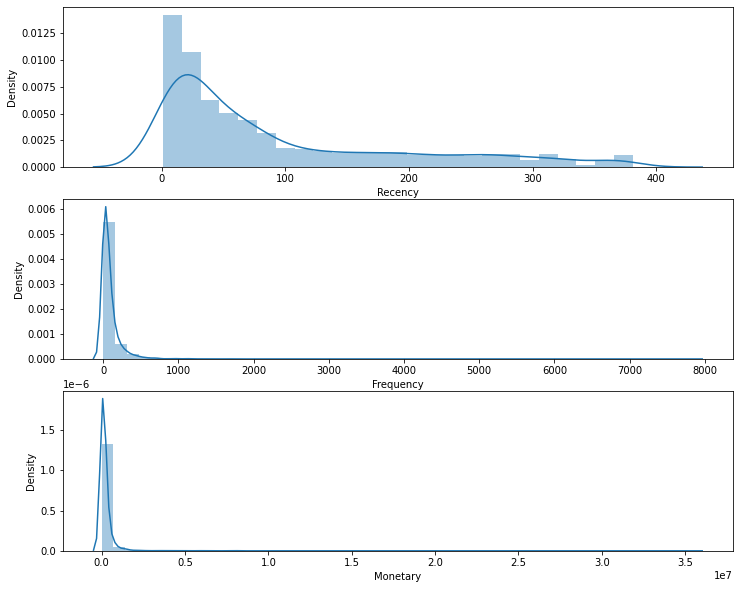

In [26]:
plt.figure(figsize=(12,10))

# plot distribution of Recency
plt.subplot(3,1,1)
sns.distplot(rfm['Recency'])

# plot distribution of Frequency
plt.subplot(3,1,2)
sns.distplot(rfm['Frequency'])

# plot distribution of Monetary
plt.subplot(3,1,3)
sns.distplot(rfm['Monetary'])
plt.show()

In [ ]:
# This provides us with very interesting insights and how skewed our data is. There are outliers
# which will be investigated later .The important thing is we will be grouping these values in quantiles.

## RFM Score

In [29]:
# Split the into four segments using the quantile
quantiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile(q = [0.25, 0.50, 0.75])
quantiles = quantiles.to_dict()

In [30]:
quantiles

{'Recency': {0.25: 19.0, 0.5: 52.0, 0.75: 143.25},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 39288.0, 0.5: 86147.0, 0.75: 210833.75}}

In [ ]:
# We create 4 labels where '4' is the best quantile for each 'Recency', 'Frequency' and 'Monetary'

In [31]:
# Use the qcut() function to create four quantiles and create columns 'R', 'F' and 'M'
rfm['R'] = pd.qcut(rfm['Recency'], q=4, labels=[4,3,2,1])

rfm['F'] = pd.qcut(rfm['Frequency'], q=4, labels=[1,2,3,4])

rfm['M'] = pd.qcut(rfm['Monetary'], q=4, labels=[1,2,3,4])

In [32]:
rfm.head(10)

,index,CustomerID,Recency,Frequency,Monetary,R,F,M
0,0,4355.0,44,21,39209.0,3,2,1
1,1,4352.0,40,118,285781.0,3,4,4
2,2,4349.0,51,98,64097.0,3,3,2
3,3,4341.0,11,104,256324.0,4,4,4
4,4,4339.0,219,88,201305.0,1,3,3
5,5,4333.0,193,124,246358.0,1,4,4
6,6,4331.0,13,164,850894.0,4,4,4
7,7,4328.0,45,242,699346.0,3,4,4
8,8,4325.0,5,272,797952.0,4,4,4
9,9,4313.0,2,134,333049.0,4,4,4


In [33]:
# Create the 'RFM_Score'
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

In [34]:
rfm.head()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,0,4355.0,44,21,39209.0,3,2,1,321
1,1,4352.0,40,118,285781.0,3,4,4,344
2,2,4349.0,51,98,64097.0,3,3,2,332
3,3,4341.0,11,104,256324.0,4,4,4,444
4,4,4339.0,219,88,201305.0,1,3,3,133


In [35]:
rfm.tail()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score
4319,4319,12.0,2,17,105674.0,4,1,3,413
4320,4320,9.0,215,13,65832.0,1,1,2,112
4321,4321,7.0,208,4,9410.0,1,1,1,111
4322,4322,5.0,311,16,41976.0,1,1,2,112
4323,4323,3244.0,307,1,501.0,1,1,1,111


## Customer Segmentation by Recency and Frequency

In [36]:
# Create a column 'Segment' where we classify customers based on their RFM_Score
# determine how to name segments using regex
segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][2-3]': 'At risk',
    r'[1-2]4': 'Can\'t loose them',
    r'2[1-2]': 'About to sleep',
    r'22': 'Need attention',
    r'[2-3][3-4]': 'Loyal customers',
    r'31': 'Promising',
    r'41': 'New customers',
    r'[3-4][1-2]': 'Potential loyalists',
    r'4[3-4]': 'Champions'
}

In [37]:
rfm['Segment'] = rfm.R.astype(str) + rfm.F.astype(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)


In [38]:
rfm.head(10)

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,0,4355.0,44,21,39209.0,3,2,1,321,Potential loyalists
1,1,4352.0,40,118,285781.0,3,4,4,344,Loyal customers
2,2,4349.0,51,98,64097.0,3,3,2,332,Loyal customers
3,3,4341.0,11,104,256324.0,4,4,4,444,Champions
4,4,4339.0,219,88,201305.0,1,3,3,133,At risk
5,5,4333.0,193,124,246358.0,1,4,4,144,Can't loose them
6,6,4331.0,13,164,850894.0,4,4,4,444,Champions
7,7,4328.0,45,242,699346.0,3,4,4,344,Loyal customers
8,8,4325.0,5,272,797952.0,4,4,4,444,Champions
9,9,4313.0,2,134,333049.0,4,4,4,444,Champions


In [47]:
# Validate the data as per the RFM_Score and the Segment given(for example: RFM_Score-444)
validatation_df = rfm[rfm['RFM_Score']=='133'].sort_values('Monetary', ascending = False).head(10)

In [48]:
validatation_df.head(10)

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
4,4,4339.0,219,88,201305.0,1,3,3,133,At risk
945,945,268.0,151,98,200790.0,1,3,3,133,At risk
2361,2361,27.0,316,76,200342.0,1,3,3,133,At risk
2019,2019,2069.0,165,91,199482.0,1,3,3,133,At risk
1257,1257,2887.0,212,91,195538.0,1,3,3,133,At risk
4129,4129,849.0,195,86,195048.0,1,3,3,133,At risk
248,248,3295.0,167,76,188901.0,1,3,3,133,At risk
2091,2091,1550.0,205,63,186819.0,1,3,3,133,At risk
1604,1604,344.0,317,45,186675.0,1,3,3,133,At risk
2550,2550,2161.0,152,82,184196.0,1,3,3,133,At risk


In [49]:
# Let's group our dataset in order to see the average values of each segment
rfm.groupby('Segment').mean().sort_values('Monetary')

,index,CustomerID,Recency,Frequency,Monetary
Segment,,,,,
Promising,3105.010989,2235.137363,34.285714,9.285714,42954.142857
New customers,3147.896907,1986.876289,11.474227,10.030928,45926.814433
Hibernating,2857.907133,2183.639300,184.285330,17.212651,55252.275303
Potential loyalists,2340.339853,2272.105134,25.066015,28.833741,98801.112469
At risk,1950.783726,2115.182013,137.261242,63.914347,140284.875803
Can't loose them,1263.492386,2185.096447,110.015228,163.385787,300006.436548
Loyal customers,1487.504717,2221.635220,32.187107,137.022013,311929.891509
Champions,1371.578824,2170.027059,9.058824,243.274118,651716.027059


In [50]:
# Create a new dataframe consisting only of Recency, Frequency and Monetary columns which will be used for model
# building

new_rfm = rfm[['Recency', 'Frequency', 'Monetary']]
new_rfm.head()

,Recency,Frequency,Monetary
0,44,21,39209.0
1,40,118,285781.0
2,51,98,64097.0
3,11,104,256324.0
4,219,88,201305.0


## So how does it look?

In [ ]:
# To get a birds eye view of your overall customer base, we can plot a simple bar chart
# showing how many customers reside in each category.

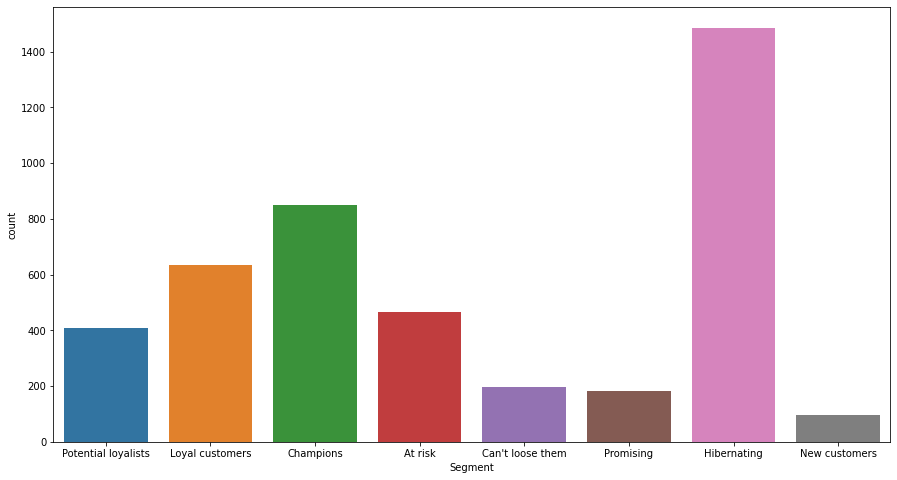

In [51]:
plt.figure(figsize=(15,8))
sns.countplot(x = rfm.Segment, data = rfm)
plt.show()

In [ ]:
# Unfortunately, it looks like most of our customers are hibernating. 
# On the bright side, we have some champions,some loyal customers and some potential loyalists. 
# We’d better take good care of them.

## Feature Scaling

<AxesSubplot:ylabel='Monetary'>

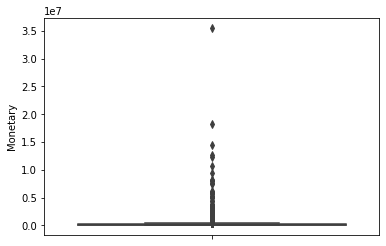

In [52]:
# Check for outliers in the 'Monetary' feature
sns.boxplot(y = 'Monetary', data = rfm)

In [53]:
# We see presence of outliers, hence Standardization will be used for feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_data = sc.fit_transform(new_rfm)
scaled_data

array([[-0.49703642, -0.30876727, -0.22554737],
       [-0.53699487,  0.11557147,  0.05998016],
       [-0.42710912,  0.02807895, -0.19672735],
       ...,
       [ 1.14126023, -0.38313591, -0.26005427],
       [ 2.17019043, -0.3306404 , -0.22234322],
       [ 2.13023198, -0.39625979, -0.27037079]])

In [54]:
scaled_data = pd.DataFrame(scaled_data, index = rfm.index, columns = new_rfm.columns)

In [55]:
scaled_data.head()

,Recency,Frequency,Monetary
0,-0.497036,-0.308767,-0.225547
1,-0.536995,0.115571,0.059980
2,-0.427109,0.028079,-0.196727
3,-0.826694,0.054327,0.025869
4,1.251146,-0.015667,-0.037842


## Build Clustering Model

In [56]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}

for k in range(1, 15):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=300)
    km = km.fit(scaled_data)
    sum_of_sq_dist[k] = km.inertia_


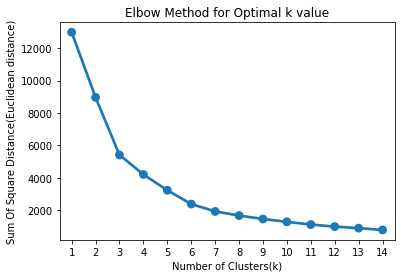

In [57]:
# Visualization to get actual k value(Elbow method)
sns.pointplot(x = list(sum_of_sq_dist.keys()),
             y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum Of Square Distance(Euclidean distance)')
plt.title('Elbow Method for Optimal k value')
plt.show()

In [58]:
# From the above Elbow graph, the value of k can be taken as 3, 4 or 6
# we use k = 6

km = KMeans(n_clusters=6, init='k-means++', max_iter=300)


In [59]:
y_kmeans = km.fit_predict(scaled_data)

In [60]:
y_kmeans

array([5, 5, 5, ..., 1, 1, 1], dtype=int32)

In [61]:
# Append this cluster value in our rfm dataset
rfm['Cluster'] = km.labels_
rfm.head(20)

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment,Cluster
0,0,4355.0,44,21,39209.0,3,2,1,321,Potential loyalists,5
1,1,4352.0,40,118,285781.0,3,4,4,344,Loyal customers,5
2,2,4349.0,51,98,64097.0,3,3,2,332,Loyal customers,5
3,3,4341.0,11,104,256324.0,4,4,4,444,Champions,5
4,4,4339.0,219,88,201305.0,1,3,3,133,At risk,1
5,5,4333.0,193,124,246358.0,1,4,4,144,Can't loose them,1
6,6,4331.0,13,164,850894.0,4,4,4,444,Champions,5
7,7,4328.0,45,242,699346.0,3,4,4,344,Loyal customers,0
8,8,4325.0,5,272,797952.0,4,4,4,444,Champions,0
9,9,4313.0,2,134,333049.0,4,4,4,444,Champions,5


In [62]:
# Look at the centroids per cluster
centroid_df = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary',
                                      'CustomerID']].agg({'Recency' : 'mean',
                                                          'Frequency' : 'mean',
                                                          'Monetary' : 'mean',
                                                          'CustomerID' : 'nunique'}).reset_index()

In [63]:
centroid_df

,Cluster,Recency,Frequency,Monetary,CustomerID
0,0,16.803279,392.773224,8.525544e+05,366
1,1,250.863378,27.732448,6.001158e+04,1054
2,2,3.000000,2053.000000,3.553619e+07,1
3,3,2.500000,5796.500000,8.498582e+06,4
4,4,10.562500,770.875000,8.192404e+06,16
5,5,46.706903,64.321887,1.511798e+05,2883


In [64]:
# Save the rfm data in a csv file
rfm.to_csv('rfm_Final_output.csv')

## Conclusion:

The CustomerID's are segmented in proper segments. The results are given to the business team .
For each segment appropriate actions can be designed.For example,

- Hibernating:Recreate brand value. Offer relevant products and good offers.
- Champions: Reward them. They can become early adopters of new products.
- Loyal customers: Up-sell higher value products. Engage them. Ask for reviews.
- Potential loyalist: Recommend other products. Engage in loyalty programs.
